In [15]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from os import environ

filename = environ['input_data_fp']
fig_no = int(environ['input_fig_number'])
fig_no = 30
if fig_no == 1:
    fig_size = 10
else:
    fig_size = 20

pd.options.display.float_format = '{:10,.2f}'.format
pd.set_option('display.width', 999)

key_index = ['actual_paint_frames',
            'expected_frames', 
            'frame_throughput',
            'long_frame']

with open(filename) as data_file:
    data = json.load(data_file)
    fps = data["video-recording-fps"]
    remove_data = ["video-recording-fps"]
    for item in remove_data:
        del data[item]
    d = pd.DataFrame(data)
    df = pd.concat([pd.DataFrame(d[column]['time_list']).T for column in d], axis=1)
    dft = df.loc[key_index, :]

In [32]:
non_freeze_frame_timestamps = pd.concat([pd.DataFrame(d[column]['time_list']) for column in d], axis=1).loc[:,'non_freeze_frame_timestamps']
non_freeze_frame_timestamps.columns = d.columns
case_name_list = list(non_freeze_frame_timestamps)

case = case_name_list[0]
c = non_freeze_frame_timestamps[case]
frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T


In [33]:
str(case)

'test_chrome_facebook_ft_type_composerbox_100_txt_delay_30ms'

In [25]:
frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.05,1.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.25,4.00,3.00,4.00,3.00,4.00,4.00,3.00,3.00,3.00,3.00,...,3.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00
0.50,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
0.75,8.00,7.00,9.00,9.00,7.00,7.00,6.00,8.00,8.00,8.00,...,8.00,9.00,8.00,6.00,8.00,7.00,8.00,7.00,9.00,9.00
0.95,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,16.00,18.00,...,18.00,16.00,18.00,15.00,13.00,18.00,15.00,18.00,18.00,18.00
0.99,18.00,18.00,18.00,18.00,20.00,18.00,20.00,18.00,18.00,19.00,...,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00


In [26]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,69.00,70.00,66.00,68.00,65.00,68.00,68.00,70.00,69.00,69.00,...,69.00,69.00,68.00,71.00,71.00,69.00,71.00,68.00,67.00,66.00
mean,5.84,5.74,6.11,5.90,6.15,5.90,5.90,5.74,5.84,5.84,...,5.86,5.84,5.91,5.68,5.68,5.81,5.69,5.93,6.03,6.08
std,4.25,4.34,4.18,4.40,4.37,4.39,4.53,4.29,4.13,4.41,...,4.34,4.06,4.28,4.24,3.94,4.28,4.22,4.21,4.26,4.27
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,4.00,3.25,4.00,3.00,4.00,3.75,3.00,3.25,3.00,3.00,...,3.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00
50%,5.00,5.00,5.00,5.00,5.00,5.00,4.50,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
75%,8.00,7.00,9.00,9.00,7.00,7.00,6.75,7.75,8.00,8.00,...,8.00,9.00,8.25,6.50,8.50,7.00,8.00,7.00,9.00,9.00
max,18.00,20.00,18.00,18.00,20.00,20.00,20.00,18.00,18.00,19.00,...,18.00,20.00,18.00,20.00,18.00,18.00,18.00,18.00,19.00,18.00


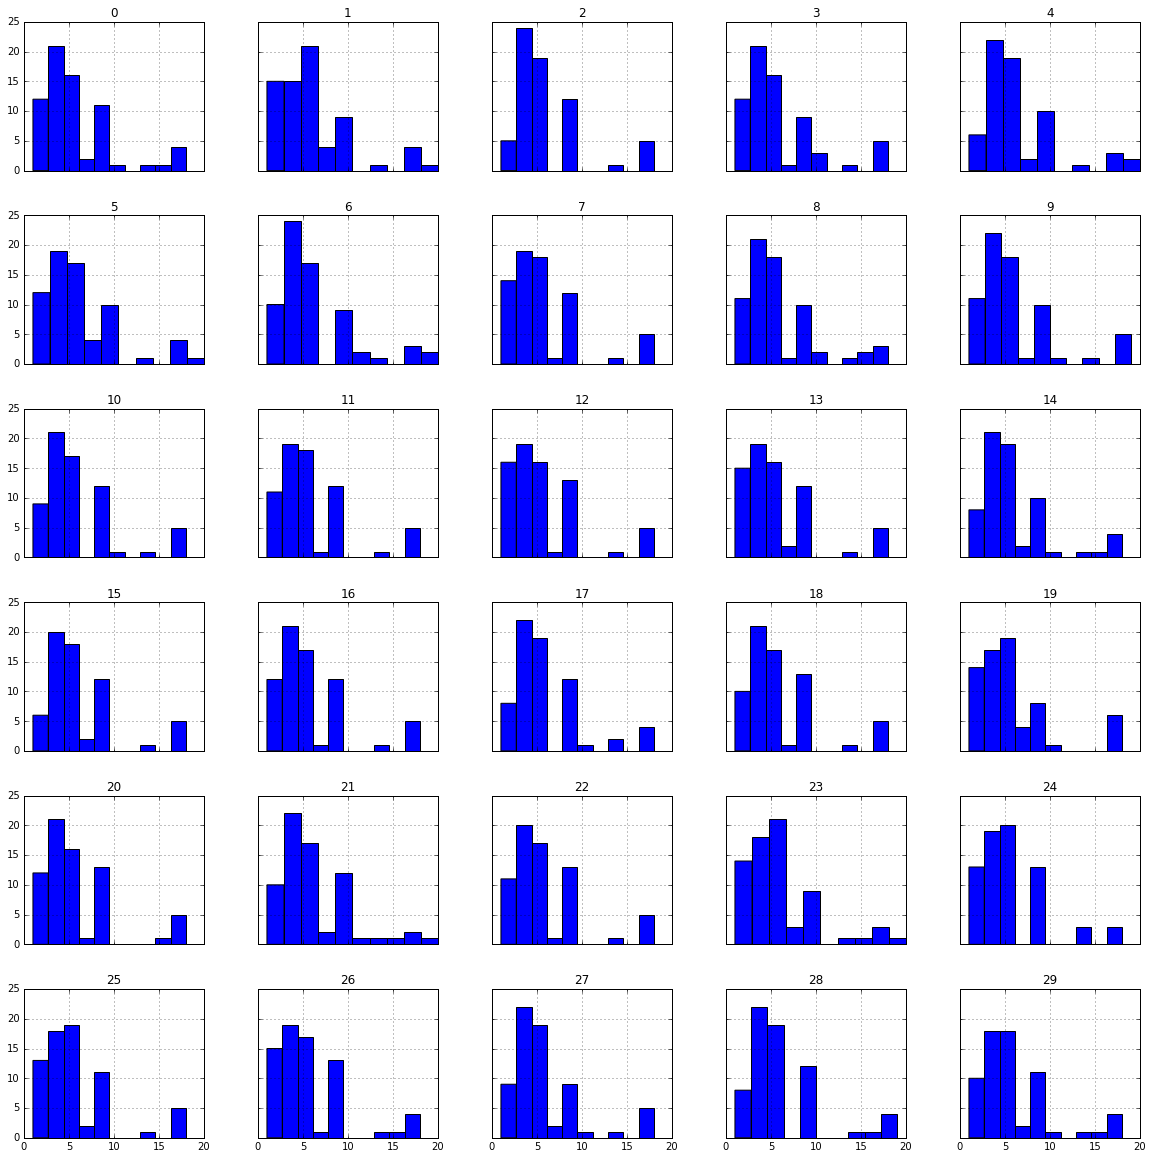

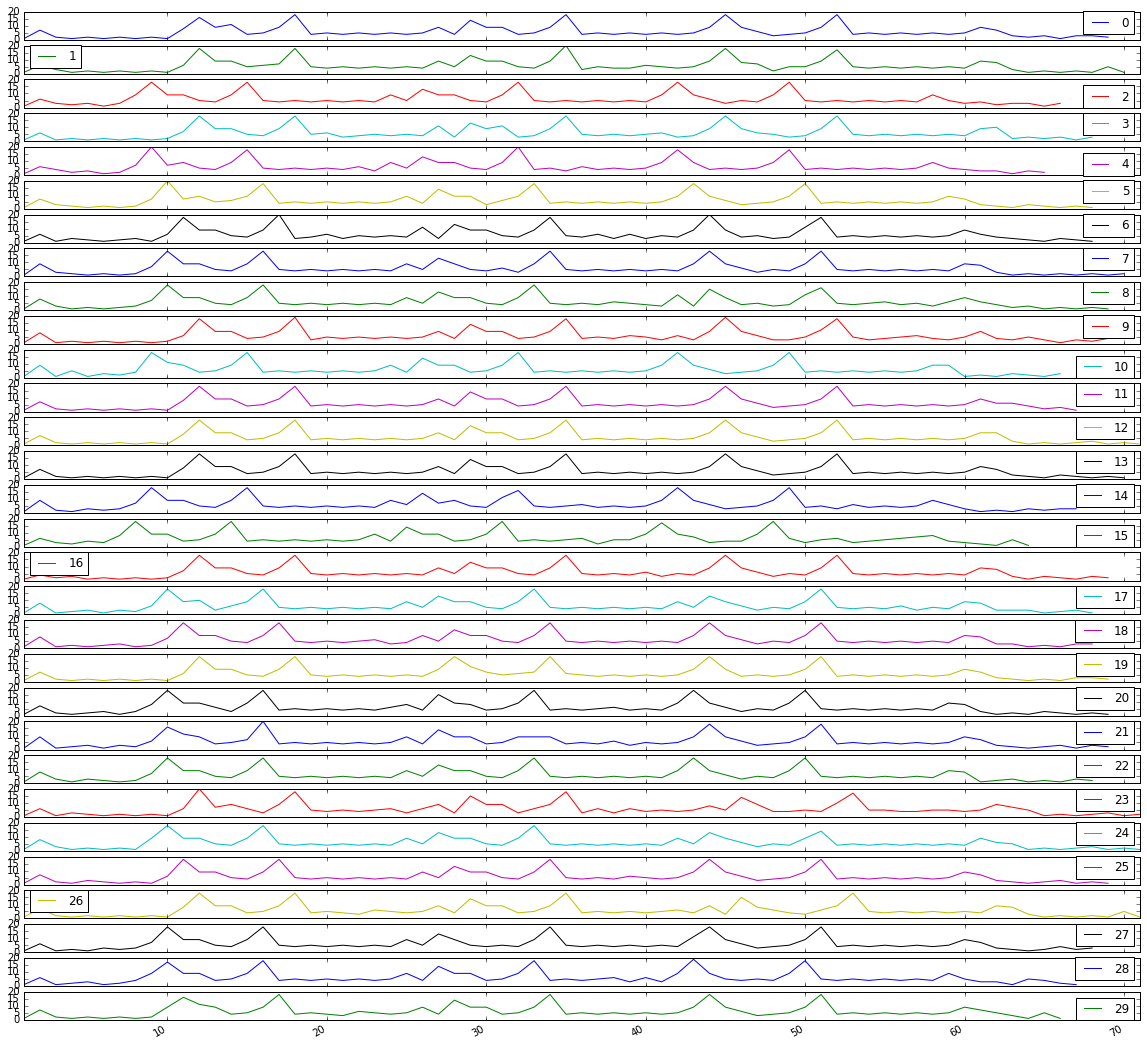

In [28]:
frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,20), ylim=(0,30))
plt.show()

In [34]:
case = case_name_list[1]
c = non_freeze_frame_timestamps[case]
frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T


In [35]:
str(case)

'test_firefox_facebook_ft_type_composerbox_100_txt_delay_30ms'

In [36]:
frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00
0.05,1.00,2.00,1.00,1.00,2.00,2.00,1.00,3.00,2.00,2.00,...,2.00,2.00,2.00,2.00,1.00,2.00,3.00,2.00,4.00,1.00
0.25,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,...,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
0.50,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
0.75,7.00,8.00,9.00,7.00,8.00,8.00,8.00,9.00,9.00,8.00,...,8.00,9.00,8.00,8.00,9.00,9.00,9.00,8.00,5.00,7.00
0.95,18.00,16.00,18.00,18.00,18.00,15.00,20.00,15.00,16.00,14.00,...,13.00,17.00,14.00,16.00,14.00,15.00,16.00,18.00,9.00,18.00
0.99,20.00,18.00,21.00,20.00,21.00,18.00,23.00,18.00,18.00,18.00,...,18.00,21.00,18.00,20.00,15.00,19.00,18.00,19.00,13.00,19.00


In [37]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,63.00,65.00,62.00,61.00,61.00,62.00,61.00,61.00,61.00,64.00,...,63.00,63.00,65.00,63.00,65.00,60.00,61.00,62.00,83.00,63.00
mean,6.43,6.20,6.48,6.59,6.61,6.53,6.61,6.64,6.62,6.30,...,6.40,6.38,6.25,6.38,6.20,6.75,6.66,6.48,5.39,6.41
std,4.37,4.02,4.73,4.80,4.94,4.20,5.17,4.19,4.34,3.97,...,3.92,4.91,3.95,4.17,3.70,4.46,4.23,4.24,2.32,4.54
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,...,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
50%,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.50,5.00,5.00
75%,7.00,8.00,8.75,7.00,8.00,8.00,8.00,9.00,9.00,8.25,...,8.00,9.00,8.00,8.00,9.00,9.00,9.00,8.00,5.00,7.50
max,22.00,21.00,23.00,23.00,25.00,20.00,24.00,21.00,21.00,20.00,...,21.00,27.00,18.00,21.00,18.00,24.00,21.00,22.00,13.00,20.00


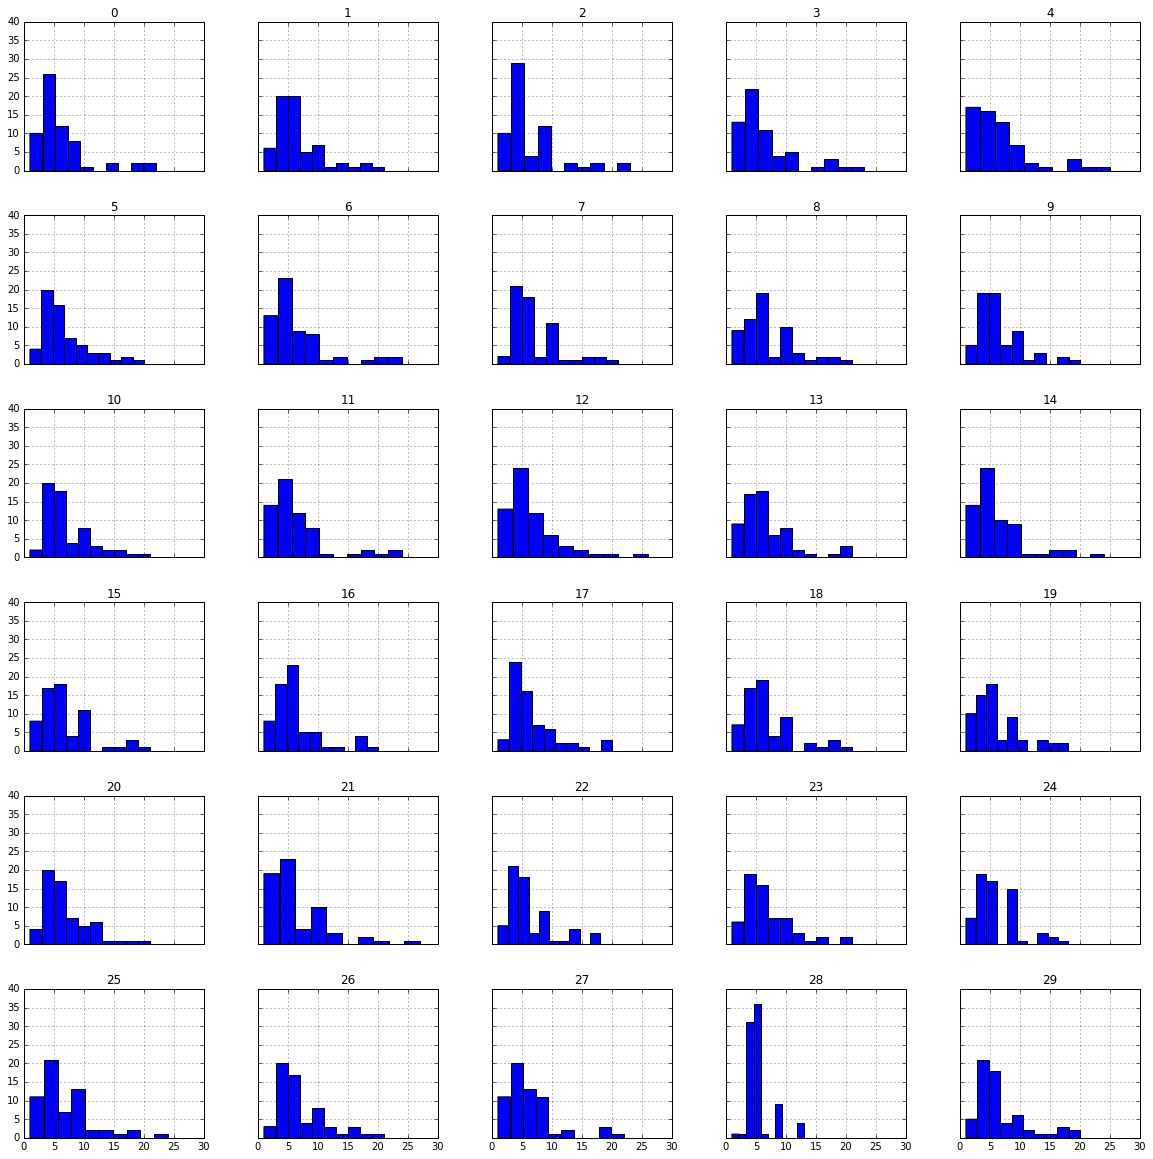

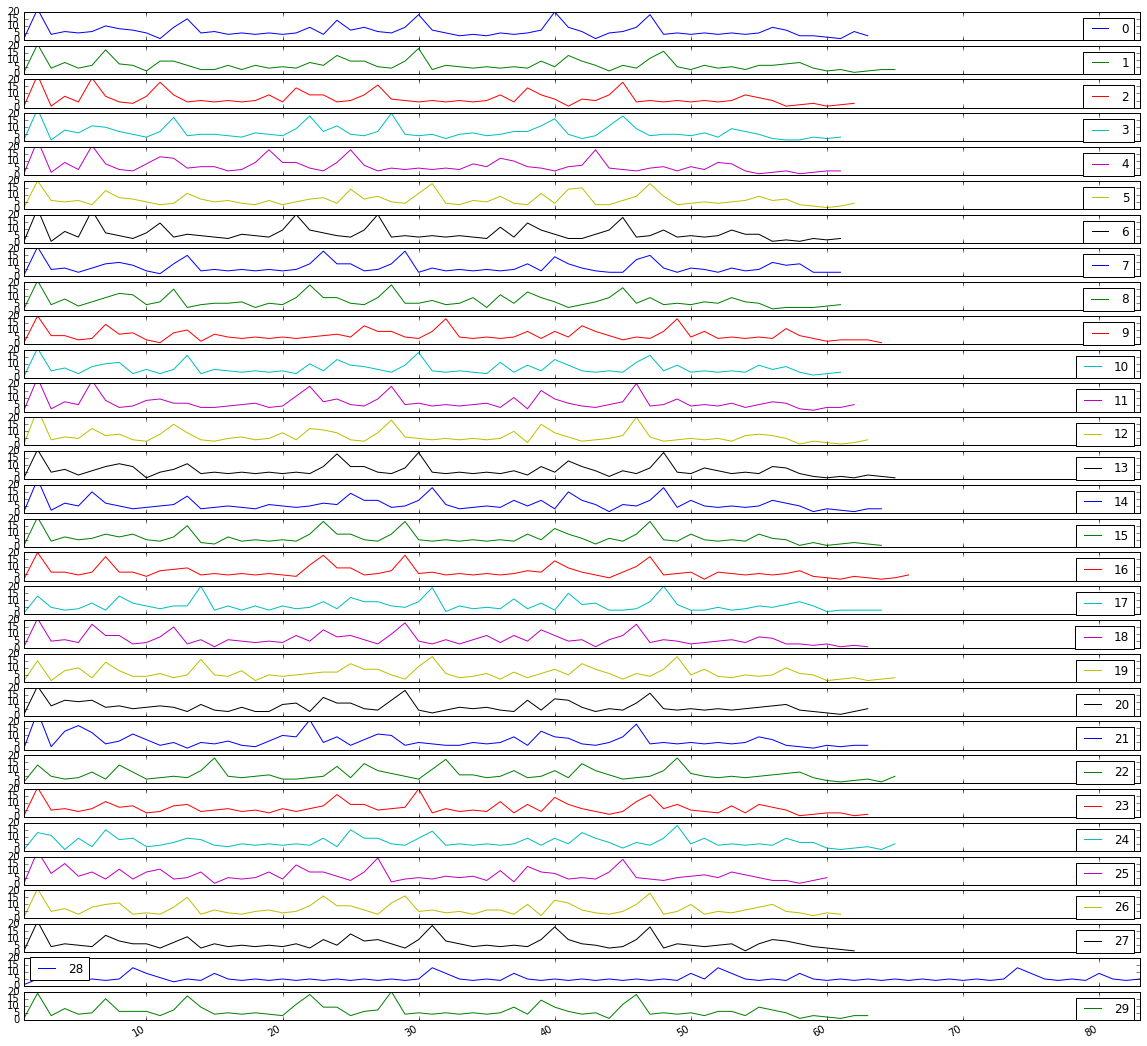

In [38]:
frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,20), ylim=(0,30))
plt.show()